In [30]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
import math

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
%matplotlib inline

In [31]:
# Importing Training Set
dataset_train = pd.read_csv('dataset2.csv')

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:6]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['Date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (2800, 7)
All timestamps == 2800
Featured selected: ['Open', 'High', 'Low', 'Close', 'Adj Close']


In [32]:
test=dataset_train.iloc[239:]['Open']
print(test)

239       224.701004
240       231.548996
241       229.895004
242       229.113998
243       230.255997
            ...     
2795    20262.480469
2796    20041.035156
2797    19615.154297
2798    20298.611328
2799    19799.582031
Name: Open, Length: 2561, dtype: float64


In [33]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (2800, 5).


array([[  320.434998,   320.434998,   314.002991,   314.248993,
          314.248993],
       [  314.07901 ,   315.838989,   313.565002,   315.032013,
          315.032013],
       [  314.846008,   315.149994,   281.082001,   281.082001,
          281.082001],
       ...,
       [19615.154297, 20357.462891, 19600.785156, 20297.994141,
        20297.994141],
       [20298.611328, 20542.644531, 19617.640625, 19796.808594,
        19796.808594],
       [19799.582031, 20420.990234, 19799.582031, 20049.763672,
        20049.763672]])

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-0.76843532],
       [-0.76881797],
       [-0.7687718 ],
       ...,
       [ 0.39317465],
       [ 0.43432116],
       [ 0.40427784]])

In [35]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 60   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (2651, 90, 4).
y_train shape == (2651, 1).


In [36]:
# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],4)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],4)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],4)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 90, 50)            8250      
_________________________________________________________________
dropout_5 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
gru_6 (GRU)                  (None, 90, 50)            15150     
_________________________________________________________________
dropout_6 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
gru_7 (GRU)                  (None, 90, 50)            15150     
_________________________________________________________________
dropout_7 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
gru_8 (GRU)                  (None, 50)               

In [37]:
modelGRU.compile(optimizer='adam', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=100, batch_size=300)

Epoch 1/100
2651/2651 [==============================] - 27s 10ms/step - loss: 0.5145
Epoch 2/100
2651/2651 [==============================] - 26s 10ms/step - loss: 0.2213
Epoch 3/100
2651/2651 [==============================] - 30s 11ms/step - loss: 0.1890
Epoch 4/100
2651/2651 [==============================] - 24s 9ms/step - loss: 0.1768
Epoch 5/100
2651/2651 [==============================] - 17s 7ms/step - loss: 0.1713
Epoch 6/100
2651/2651 [==============================] - 27s 10ms/step - loss: 0.1669
Epoch 7/100
2651/2651 [==============================] - 19s 7ms/step - loss: 0.1696
Epoch 8/100
2651/2651 [==============================] - 20s 8ms/step - loss: 0.1655
Epoch 9/100
2651/2651 [==============================] - 25s 9ms/step - loss: 0.1661
Epoch 10/100
2651/2651 [==============================] - 21s 8ms/step - loss: 0.1671
Epoch 11/100
2651/2651 [==============================] - 19s 7ms/step - loss: 0.1697
Epoch 12/100
2651/2651 [==============================] - 1

2651/2651 [==============================] - 20s 8ms/step - loss: 0.0335
Epoch 97/100
2651/2651 [==============================] - 20s 8ms/step - loss: 0.0350
Epoch 98/100
2651/2651 [==============================] - 20s 7ms/step - loss: 0.0334
Epoch 99/100
2651/2651 [==============================] - 20s 8ms/step - loss: 0.0346
Epoch 100/100
2651/2651 [==============================] - 20s 7ms/step - loss: 0.0314


In [38]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [39]:
# Perform predictions
predictions_future = modelGRU.predict(X_train[-n_future:])

predictions_train = modelGRU.predict(X_train[n_past:])

In [40]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Open
2015-08-28,356.960022
2015-08-29,358.253967
2015-08-30,359.834045


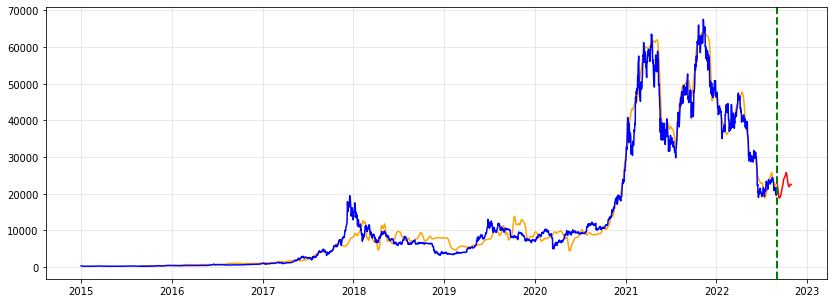

In [41]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2015-08-28'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Open'], color='orange', label='Training predictions')
plt.plot(datelist_train, dataset_train['Open'], color='b', label='Actual Stock Price')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

# plt.legend(shadow=True)
# plt.title('Predcitions and Acutal Stock Prices', family='Arial', fontsize=12)
# plt.xlabel('Timeline', family='Arial', fontsize=10)
# plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
# plt.xticks(rotation=45, fontsize=8)
plt.show()

In [42]:
pred = np.array(PREDICTION_TRAIN["Open"])
diff = pred - test
diffLSTM=list(diff)[1:]
diffLSTM=np.array(diffLSTM)
print("MSE:", np.mean(diffLSTM**2))
print("MAE:", np.mean(abs(diffLSTM)))
print("RMSE:", np.sqrt(np.mean(diffLSTM**2)))

MSE: 6692356.590370631
MAE: 1684.8633972107255
RMSE: 2586.9589464022483


In [43]:
PREDICTION_TRAIN

,Open
2015-08-28,356.960022
2015-08-29,358.253967
2015-08-30,359.834045
2015-08-31,361.514709
2015-09-01,363.147522
...,...
2022-08-27,22601.681641
2022-08-28,22584.320312
2022-08-29,22557.308594
2022-08-30,22521.416016


In [44]:
test

239       224.701004
240       231.548996
241       229.895004
242       229.113998
243       230.255997
            ...     
2795    20262.480469
2796    20041.035156
2797    19615.154297
2798    20298.611328
2799    19799.582031
Name: Open, Length: 2561, dtype: float64

In [59]:
pred=[]
for val in PREDICTION_TRAIN['Open']:
  pred.append(val)

In [60]:
testValues=[]
percentageError=[]

for val in test:
  testValues.append(val)

for idx in range(len(testValues)):
  diff=abs(float(pred[idx])-float(testValues[idx]))
  percentageError.append(diff/float(testValues[idx]))


sum=0
for val in percentageError:
  sum+=val

print("Percentage of Error ",100*sum/len(percentageError),'%')

Percentage of Error  23.51971243302975 %


In [58]:
pred=[]
for val in PREDICTION_TRAIN['Open']:
  pred.append(val)
for i in range(len(pred)):
  pred[i]=int(pred[i])

testValues=[]
for val in test:
  testValues.append(float(val))

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

print('MSE: ',np.sqrt(mean_squared_error(testValues, pred)))
print("Mean Absolute Error: ",mean_absolute_error(testValues, pred))
print("R2 Score: ",r2_score(testValues, pred))#cooefficient of determination

MSE:  2586.3698318853494
Mean Absolute Error:  1684.102061517376
R2 Score:  0.9765159106942658


In [52]:
testValues

[224,
 231,
 229,
 229,
 230,
 228,
 229,
 227,
 230,
 234,
 239,
 239,
 243,
 238,
 238,
 239,
 235,
 230,
 230,
 230,
 229,
 233,
 232,
 231,
 231,
 226,
 230,
 230,
 234,
 235,
 234,
 232,
 239,
 236,
 236,
 237,
 237,
 238,
 238,
 240,
 246,
 243,
 242,
 243,
 244,
 246,
 245,
 249,
 252,
 254,
 262,
 270,
 261,
 263,
 269,
 266,
 273,
 276,
 281,
 283,
 285,
 293,
 304,
 313,
 328,
 315,
 325,
 361,
 403,
 408,
 388,
 374,
 384,
 374,
 379,
 339,
 314,
 338,
 336,
 333,
 319,
 330,
 334,
 334,
 326,
 322,
 326,
 324,
 323,
 320,
 328,
 351,
 357,
 357,
 371,
 377,
 361,
 359,
 361,
 363,
 389,
 389,
 395,
 414,
 417,
 415,
 452,
 431,
 433,
 443,
 465,
 454,
 455,
 463,
 462,
 442,
 437,
 436,
 443,
 454,
 455,
 416,
 423,
 422,
 433,
 425,
 430,
 434,
 433,
 430,
 433,
 431,
 430,
 457,
 453,
 448,
 448,
 448,
 434,
 432,
 430,
 365,
 387,
 381,
 387,
 379,
 419,
 409,
 382,
 388,
 402,
 392,
 392,
 395,
 380,
 378,
 378,
 369,
 372,
 374,
 370,
 388,
 386,
 376,
 376,
 373,
 376